# Portfolios Example

In [9]:
%matplotlib notebook
import numpy as np
import load_factors as lf
import pickle
from factor_portfolio import Factor_Portfolio
from factor_multi_portfolio import Factor_Multi_Portfolio
import warnings
warnings.filterwarnings('ignore')

Pre-process

In [ ]:
assets_list=lf.load_assets(['price_to_book'], '../data/')
lf.create_momentum_factor(assets_list, 21, 252, 'momentum')
prices=lf.create_factor_df(assets_list,'close',isForwardFill=False)
returns=lf._convert_prices(prices)
pickle.dump(assets_list, open('../dump/assets_list.p', 'wb'))
pickle.dump(returns, open('../dump/returns.p', 'wb'))

Load objects

In [2]:
#load objects
assets_list=pickle.load(open('../dump/assets_list.p','rb'))
returns=pickle.load(open('../dump/returns.p', 'rb'))
#get only PN assets
assets_list=lf.get_only_PN(assets_list)

### Momentum algorithm

Create algorithm

In [10]:
algorithm = Factor_Multi_Portfolio(assets_list, 'momentum', 15, n_portfolios=12)
algorithm.add_filter('../data/filter/IBX.csv')

Run

In [ ]:
algorithm.portfolio_size=15
algorithm.rebalance_window=1
algorithm.rebalance_period='monthly'
result = algorithm.run(returns,start_date='01/01/2006')
portfolios = algorithm.df_portfolios

<IPython.core.display.Javascript object>


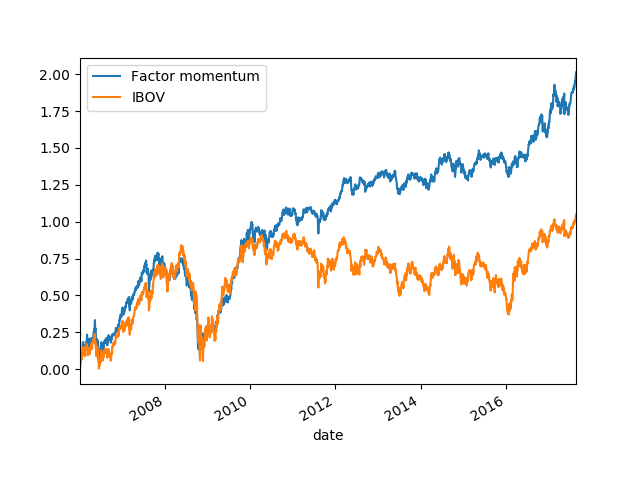

In [7]:
result.add_benchmark('../data/benchmark/IBOV.csv')
result.plot()

In [ ]:
print(result.summary())